In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [ ]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD222/IMAGES/EPR'

In [51]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/generation/excel'
path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\EPR_DATA\17.03_CD222(TODO)\EXCEL\generation\excel\gen_post.xlsx" # для винды
#list_of_files = sorted(os.listdir(directory))
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\generation_small" # для винды
data = pd.read_excel(path)

In [52]:
data

,X (250 points),Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10
0,331.719727,0.249451,0.003277,0.109863,0.039804,0.431310,0.000028,0.018876,0.000000,0.010880,0.080314
1,331.747833,0.284416,0.004006,0.126458,0.046758,0.484876,0.000037,0.022510,2.762787,0.013041,0.092566
2,331.775940,0.323874,0.004889,0.145371,0.054845,0.544490,0.000048,0.026800,5.327246,0.015604,0.106549
3,331.804077,0.368392,0.005956,0.166921,0.064245,0.610831,0.000062,0.031860,7.634187,0.018643,0.122503
4,331.832184,0.418440,0.007242,0.191387,0.075131,0.684407,0.000081,0.037804,9.667725,0.022234,0.140641
...,...,...,...,...,...,...,...,...,...,...,...
245,338.607269,-0.072380,-0.001774,-0.082597,-0.014680,-0.301564,-0.000221,-0.001643,20.778765,-0.002922,-0.080314
246,338.635376,-0.062690,-0.001441,-0.071479,-0.012367,-0.267064,-0.000172,-0.001346,16.271120,-0.002405,-0.069593
247,338.663513,-0.054221,-0.001168,-0.061768,-0.010401,-0.236218,-0.000134,-0.001100,11.077930,-0.001977,-0.060216
248,338.691620,-0.046844,-0.000945,-0.053315,-0.008737,-0.208733,-0.000104,-0.000898,5.520455,-0.001622,-0.052043


<AxesSubplot:xlabel='X (250 points)'>

<Figure size 1500x800 with 0 Axes>

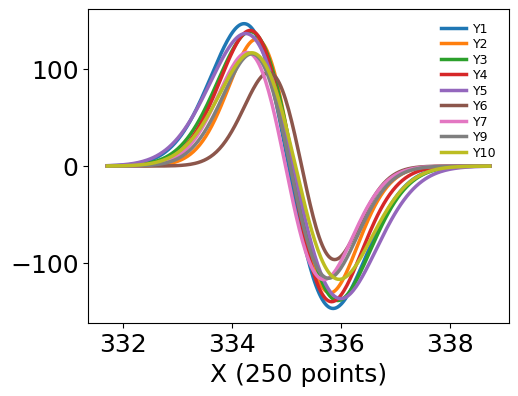

In [54]:
x = data['X (250 points)']
plt.figure(figsize=(15,8))
data.plot(x='X (250 points)', y=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y9','Y10'],)

In [55]:
y_full = data.drop(['X (250 points)', 'Y8'], axis=1)
y_names = list(y_full.columns)

In [49]:

for name in y_names:
    for i in range(1,len(y_full[name])):
        if abs(diff(y_full[name])[i]) < 200:
            y_full[name][i] = y_full[name][i]
        else:
            y_full[name][i] = (np.mean(y_full[name][i-8:i-5]))
        #y_full[name][i] = y_full[name][i] if abs(diff(y_full[name])[i]) < 350 else y_full[name][i] = (np.mean(y_full[name][i-11:i-5]));

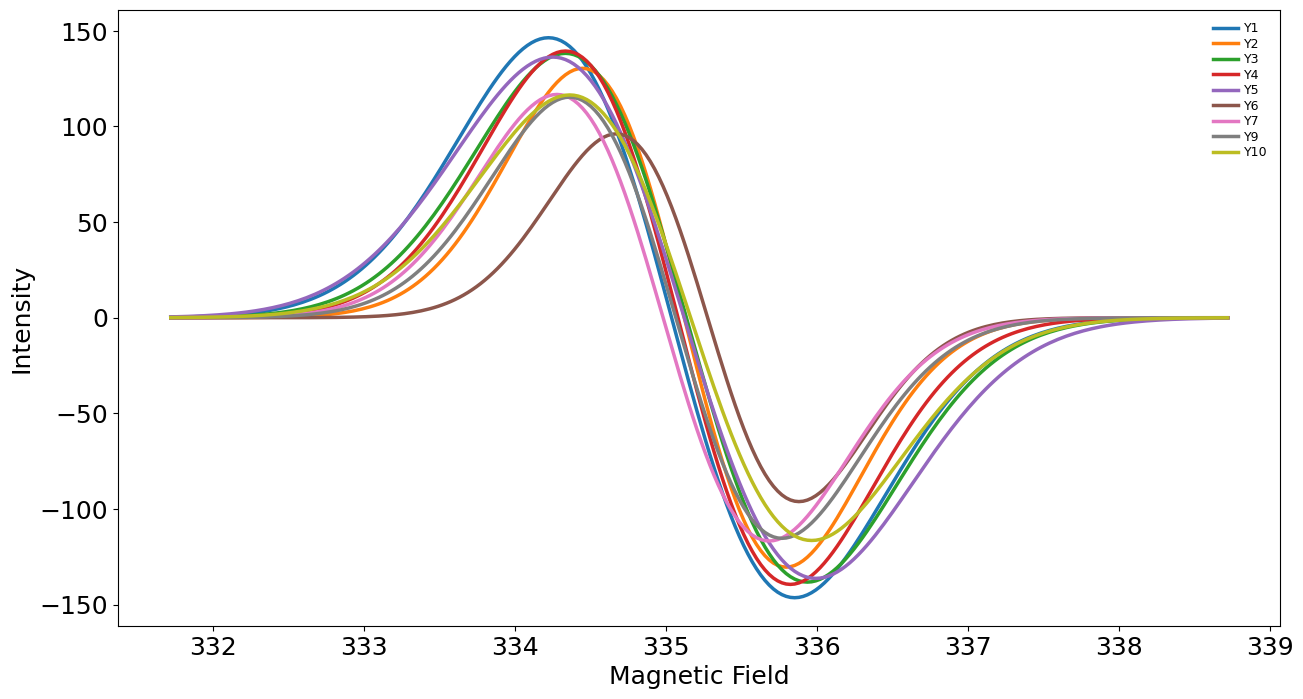

In [58]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -200,200)
for name in y_names:
    plt.plot(x, y_full[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()
    

Text(335.9, 40.7, 'g-фактор = 2.002 ')

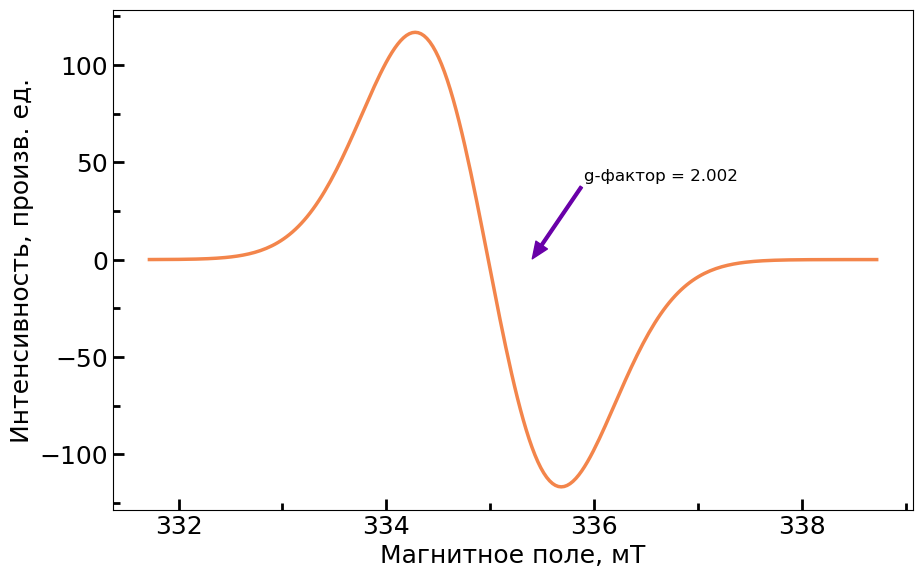

In [75]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))

#ax.set_yticks([])


ax.plot(x, y_full['Y7'],color=cm.plasma(180))
#ax.set_ylim([-600, 700])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(335.9, 40.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

#plt.savefig(save_fig+'/relaxaxtion_colored.pdf', bbox_inches='tight')